# 7 Coolest Python Packages Top Kagglers Are Using Without Telling You
## Let me expose the secrets...
![](https://cdn-images-1.medium.com/max/1200/1*5IFgojJ4nU8f0YKTcjWDrg.jpeg)
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@miphotography?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Miesha Maiden</a>
        on 
        <a href='https://www.pexels.com/photo/pineapple-with-brown-sunglasses-459601/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels.</a> All images are by author unless specified otherwise.
    </strong>
</figcaption>

## Setup

In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
optuna.logging.set_verbosity(optuna.logging.WARNING)

Kaggle is a hot spot for what is trending in data science and machine learning.

Due to its competitiveness, the top players are constantly looking for new tools, technologies, and frameworks that give them an edge over others. If a new package or an algorithm delivers actionable value, there is a good chance it receives immediate adoption and becomes popular.

This post is about 7 of such trendies packages that are direct replacements for many tools and technologies that are either outdated or need urgent upgrades.

# 1. UMAP

![](https://cdn-images-1.medium.com/max/800/1*1sUCX4FKCLjJzbEqMjg2YQ.png)
<figcaption style="text-align: center;">
    <strong>
        <a href='https://www.kaggle.com/subinium/tps-jun-this-is-original-eda-viz/notebook?scriptVersionId=64865915&cellId=37'>Link to the code of the plot.</a>
    </strong>
</figcaption>

Above is a 100k row dataset with 75 features projected to 2D using a package called UMAP. Each dot represents a single sample in a classification problem and is color-encoded based on their class.

Massive datasets like these can make you miserable during EDA, mainly because of the computation and time expenses they come with. So, it is important that each plot you create is spot-on and reveals something significant about the data.

I think that's one of the reasons why UMAP (Uniform Manifold Approximation and Projection) is so well-received on Kaggle. It is efficient, low-code, and lets you take a real "look" at the data from a high-dimensional perspective:

<p float="left">
  <img src="https://umap-learn.readthedocs.io/en/latest/_images/plotting_21_2.png" width="250" height="250">
  <img src="https://umap-learn.readthedocs.io/en/latest/_images/plotting_32_2.png" width="250" height="250"> 
  <img src="https://umap-learn.readthedocs.io/en/latest/_images/plotting_34_2.png" width="250" height="250">
</p

When I look at plots like these, they remind me of why I got into data science in the first place - data is beautiful!

### 🛠 GitHub and documentation
- https://umap-learn.readthedocs.io/en/latest/
- https://github.com/lmcinnes/umap

### 🔬 Papers
- [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://arxiv.org/abs/1802.03426)

### 💻 Demo

UMAP offers an easy, Sklearn-compatible API. After importing the `UMAP` module, call its `fit` on the feature and target arrays (`X`, `y`) to project them to 2D by default:

```python
import umap  # pip install umap-learn

# Create the mapper
mapper = umap.UMAP()
# Fit to the data
mapper.fit(X, y)

# Plot as a scatterplot
umap.plot.points(mapper)
```

The most important parameters of `UMAP` estimator are `n_neighbors` and `min_dist` (minimum distance). Think of `n_neighbors` as a handle that controls the zoom level of the projection. `min_dist` is the minimum distance between each projected point.

If you wish to project to a higher dimension, you can tweak `n_components` just like in  Sklearn's `PCA`.

# 2. Datatable

![](https://cdn-images-1.medium.com/max/800/1*HfCFXaFA0cS2uLw1Gv3x9w.png)

As dataset sizes are getting bigger, people are paying more attention to out-of-memory, multi-threaded data preprocessing tools to escape the performance limitations of Pandas.

One of the most promising tools in this regard is `datatable`, inspired by R's `data.table` package. It is developed by H2O.ai to support parallel-computing and out-of-memory operations on big data (up to 100 GB), as required by today's machine learning applications.

While `datatable` does not have as large a suite of manipulation functions as pandas, it is found to heavily outperform it on most common operations. In an [experiment](https://www.kaggle.com/rohanrao/tutorial-on-reading-large-datasets) done on a 100M row dataset, datatable manages to read the data into memory in just over a minute, 9 times faster than pandas.

### 🛠 GitHub and documentation
- https://github.com/h2oai/datatable
- https://datatable.readthedocs.io/en/latest/?badge=latest

### 💻 Demo

The main data structure in `datatable` is `Frame` (as in DataFrame). 

In [ ]:
import datatable as dt  # pip install datatable

frame = dt.fread("https://raw.githubusercontent.com/BexTuychiev/medium_stories/master/2021/august/2_popular_kaggle_packages/data/station_day.csv")
frame.head(5)

In [ ]:
type(frame)

A simple GroupBy operation:

In [ ]:
from datatable import by, f, sum

tips = sns.load_dataset("tips")
frame = dt.Frame(tips)
frame[:, sum(f.total_bill), by(f.size)]

# 3. Lazypredict

Lazypredict is one of the best one-liner packages I have ever seen.

Using the library, you can train almost all Sklearn models plus XGBoost and LightGBM in a single line of code. It only has two estimators - one for regression and one for classification. Fitting either one on a dataset with a given target will evaluate more than 30 base models and generate a report with their rankings on several popular metrics.

### 💻 Demo

```python
from lazypredict.Supervised import (  # pip install lazypredict
    LazyClassifier,
    LazyRegressor,
)
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Load data and split
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit LazyRegressor
reg = LazyRegressor(ignore_warnings=True, random_state=1121218, verbose=False)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)  # pass all sets

models.head(10)
```

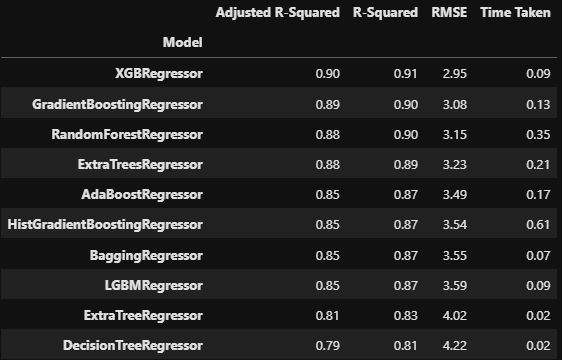

An insight like this will free you from the manual task of selecting a base model, a time much better spent on tasks like feature engineering.

### 🛠 GitHub and documentation
- https://lazypredict.readthedocs.io/en/latest/index.html
- https://github.com/shankarpandala/lazypredict

# 4. Optuna

![](https://miro.medium.com/max/1400/0*IBkpkOCS0anhUHWp.png)

One of the more recent libraries I have added to my skill-stack is Kagglers' favorite - Optuna. 

Optuna is a next-generation automatic hyperparameter tuning framework, designed to work on virtually any model and neural network available in today's ML and Deep learning packages. 

It offers several advantages over similar tools like GridSearch, TPOT, HyperOPT, etc:
- Platform-agnostic: has APIs to work with any framework, including XGBoost, LightGBM, CatBoost, Sklearn, Keras, TensorFlow, PyTorch, etc.
- A large suite of optimization algorithms with early stopping and pruning features baked in
- Easy parallelization with little or no changes to the code
- Built in support to visually explore tuning history and the importance of each hyperparameter.

My most favorite feature is its ability to pause/resume/save search histories. Optuna keeps track of all previous rounds of tuning and you can resume the search for however long you want until you get the performance you want. 

Besides, you can make Optuna RAM-independent for massive datasets and searching by storing results in a local or a remote database by just adding an extra parameter.

### 🛠 GitHub and documentation
- https://github.com/optuna/optuna
- https://optuna.readthedocs.io/en/stable/

### 🔬 Papers
- [Optuna: A Next-generation Hyperparameter Optimization Framework](https://arxiv.org/abs/1907.10902)

### 💻 Demo

In [ ]:
import optuna  # pip install optuna


def objective(trial):
    x = trial.suggest_float("x", -7, 7)
    y = trial.suggest_float("y", -7, 7)
    return (x - 1) ** 2 + (y + 3) ** 2


study = optuna.create_study()
study.optimize(objective, n_trials=200)  # number of iterations

study.best_params

In [ ]:
study.best_value

For the sake of simplicity, we are trying to optimize the function $(x - 1)^2 + (y + 3)^2$. As you can see, the tuned values for `x` and `y` are pretty close to the optimal (1, -3). 

Hyperparamter tuning for real estimators is a bit more involved, so why don't you check out my detailed guide:

https://www.kaggle.com/bextuychiev/no-bs-guide-to-hyperparameter-tuning-with-optuna

# 5. SHAP

![](https://shap.readthedocs.io/en/latest/_images/shap_header.png)

Explainable AI (XAI) is one of the strongest trends in the ML and AI sphere. Companies and businesses are starting to be fussy over the adoption of AI solutions due to their "black box" nature.

Hey, no one can blame them. If data scientists themselves are coming up with tools to understand the models they created, the worries and suspicions of business owners are entirely justified.

One of those tools that often come up in grandmasters' notebooks on Kaggle is SHAP.

SHAP (Shapley Additive exPlanations) is an approach to explain how a model works using concepts from game theory. At its score, SHAP uses something called Shapley values to explain:
- Which features in the model are the most important
- The model's decisions behind any single prediction. For example, asking which features led to this particular output.

The most notable aspects of SHAP are its unified theme and unique plots that break down the mechanics of any model and neural network. Here is an example plot that shows the feature importances in terms of Shapley values for a single prediction:

![](https://raw.githubusercontent.com/slundberg/shap/master/docs/artwork/boston_waterfall.png)

Trust me, SHAP has way cooler plots. It is such a powerful tool that the Kaggle platform has an [entire free course](https://www.kaggle.com/learn/machine-learning-explainability) built around it. 

### 🛠 GitHub and documentation
- https://shap.readthedocs.io/en/latest/index.html
- https://github.com/slundberg/shap

### 🔬 Papers
- [A Unified Approach to Interpreting Model Predictions](https://proceedings.neurips.cc/paper/2017/hash/8a20a8621978632d76c43dfd28b67767-Abstract.html)
- [From local explanations to global understanding with explainable AI for trees](https://www.nature.com/articles/s42256-019-0138-9)
- [Explainable machine-learning predictions for the prevention of hypoxaemia during surgery](https://www.nature.com/articles/s41551-018-0304-0)

### 💻 Demo
Here is a short snippet to create a beeswarm plot of all predictions from the classic Diabeters dataset:

In [ ]:
import shap  # pip install shap
import xgboost as xgb

# Load and train a model
X, y = shap.datasets.diabetes()
clf = xgb.XGBRegressor().fit(X, y)

# Explain model's predictions with SHAP
explainer = shap.Explainer(clf)
shap_values = explainer(X)

# Visualize the predictions' explanation
shap.plots.beeswarm(shap_values)

# 6. Rapids cuDF

![](https://cdn-images-1.medium.com/max/800/1*ZoH5jGuQiKKhxeZYNHcwDA.png)

If you thought GPUs are deep learning-exclusive, you are *horribly* mistaken.

The cuDF library, created by the open-source platform RAPIDs, enables you to run tabular manipulation operations on one or more GPUs.

Unlike datatable, cuDF has a very similar API to Pandas, thus offering a less steep learning curve. As it is standard with GPUs, the library is super fast, giving it an edge over datatable when combined with its Pandas-like API.

The only hassle when using cuDF is its installation - it requires:
- CUDA Toolkit 11.0+
- NVIDIA driver 450.80.02+
- Pascal architecture or better (Compute Capability >=6.0)

If you want to try out the library without installation limitations, Kaggle kernels are a great option. Here is a [notebook](https://www.kaggle.com/rohanrao/tutorial-on-reading-large-datasets?scriptVersionId=49328159&cellId=14) to get you started.

### 🛠 GitHub and documentation
- https://docs.rapids.ai/api/cudf/stable/
- https://github.com/rapidsai/cudf

### 💻 Demo
Here is a snippet from the documentation that shows a simple GroupBy operation on the tips dataset:

```python
import cudf, io, requests
from io import StringIO

url = "https://github.com/plotly/datasets/raw/master/tips.csv"
content = requests.get(url).content.decode('utf-8')

tips_df = cudf.read_csv(StringIO(content))
tips_df['tip_percentage'] = tips_df['tip'] / tips_df['total_bill'] * 100

# display average tip by dining party size
print(tips_df.groupby('size').tip_percentage.mean())
```

# 7. Automatic EDA libraries

Normally, I am against any library or tool that takes a programmer away from writing actual code. But, since auto-EDA libraries are all the rage now on Kaggle, I had to include this section for completeness.

Initially, this section was supposed to be only about AutoViz, which uses XGBoost under the hood to display the most important information of the dataset (that's why I chose it). Later, I decided to include a few others as well.

Here is a list of the best auto EDA libraries I have found:
- **DataPrep** - the most comprehensive auto EDA \[[GitHub](https://github.com/sfu-db/dataprep), [Documentation](https://docs.dataprep.ai/index.html)\]
- **AutoViz** - the fastest auto EDA \[[GitHub](https://github.com/AutoViML/AutoViz)]
- **PandasProfiling** - the earliest and one of the best auto EDA tools \[[GitHub](https://github.com/pandas-profiling/pandas-profiling), [Documentation](https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/)\]
- **Lux** - the most user-friendly and luxurious EDA \[[GitHub](https://github.com/lux-org/lux), [Documentation](https://lux-api.readthedocs.io/en/latest/)\]

### 💻 Demo
If you want to see how each package performs EDA, check out this great [notebook](https://www.kaggle.com/andreshg/automatic-eda-libraries-comparisson/notebook#6.-%F0%9F%93%8A-D-Tale-%F0%9F%93%9A) on Kaggle.

## Summary

The available tools and packages to execute data science tasks are endless. Everyone has the right to be overwhelmed by this.

But I sincerely hope the tools outlined in this posted helped narrow down your focus to what is trending and delivering results in the hands of members of the largest ML community.

## Here are my latest viral hits...
- [20 Burning XGBoost FAQs Answered to Use the Library Like a Pro](https://towardsdatascience.com/20-burning-xgboost-faqs-answered-to-use-the-library-like-a-pro-f8013b8df3e4?source=your_stories_page-------------------------------------)
- [25 Pandas Functions You Didn’t Know Existed | P(Guarantee) = 0.8](https://towardsdatascience.com/25-pandas-functions-you-didnt-know-existed-p-guarantee-0-8-1a05dcaad5d0?source=your_stories_page-------------------------------------)
- [Matplotlib vs. Plotly: Let’s Decide Once and for All
](https://towardsdatascience.com/matplotlib-vs-plotly-lets-decide-once-and-for-all-ad25a5e43322?source=your_stories_page-------------------------------------)